## Student name: Firdosa mohamed

## Student pace: Hybrid

## Technical mentor : Maryann Mwikali

## Problem statement

The goal of this project is to create a prediction model that can identify SyriaTel customers who are prone to churn. Our goal is to identify predictable patterns and key features linked with customer churn. Specifically, check if  there any patterns among clients that stop utilizing SyriaTel services? and What features make a substantial contribution to client churn?

## Business Understanding

SyriaTel is a prominent mobile network operator in Syria.The company provides calls, news, messages, GSM, and internet services. The industry is now experiencing severe competition, thus client retention is critical for sustaining corporate revenue development. Customer churn study will assist us in identifying the factors that contribute to customer attrition. This will allow for the execution of steps that will assist reduce the number of clients who discontinue utilizing the company's services. The stakeholder audience here includes the data analytics team, sales team, senior management, and marketing executives.

## Objectives

1.Create a machine learning model that can effectively anticipate customer attrition based on previous customer data and behavioral patterns.

2.Identify the essential attributes that contribute significantly to client attrition.This will allow for the development of insights into the fundamental reasons.

3.To achieve a high level of accuracy and recall in the churn prediction model in order to reduce both false negatives (customers who churn but were not forecasted) and false positives (customers who were expected to churn but did not).

4.Utilize the prediction model to develop mitigation strategies to assist reduce customer turnover.

5.To make advice to the company on how to retain clients, which will assist the company keep its market share.

## Import necessary libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

## Data understanding

In [68]:
# loading data 
df = pd.read_csv("C:\\Users\\Adan\\Downloads\\bigml_59c28831336c6604c800002a.csv")
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [69]:
# checkthe shape of the dataset
df.shape

(3333, 21)

In [70]:
# check for datatypes
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

there are 5 columns with object values and the rest have numeric values

In [71]:
# checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [72]:
# check for duplicates 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

There are no duplicates and missing values in our data set hence will proceed to EDA

## Exploratory data analysis

In [73]:
#dropping phonenumber column not important in our analysis
df.drop(['phone number'],axis=1,inplace=True)


In [74]:
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

## Univariate Analysis

Below are visualizaions of counts in the categorical variables except the state colum

415    1655
510     840
408     838
Name: area code, dtype: int64


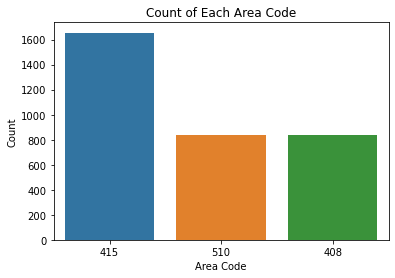

In [75]:
area_code_counts = df['area code'].value_counts()
print(area_code_counts)

# Plot the counts using Seaborn
sns.countplot(data=df, x='area code', order=area_code_counts.index)
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.title('Count of Each Area Code')
plt.show()

In [76]:
df['churn'] = df['churn'].map({True: 1, False: 0}).astype('int') 

0    2850
1     483
Name: churn, dtype: int64


Text(0.5, 1.0, 'count of churn')

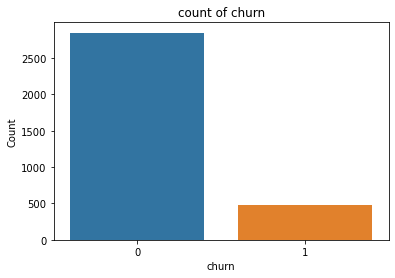

In [77]:
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');
plt.xlabel('churn')
plt.ylabel('Count')
plt.title('count of churn')

no     3010
yes     323
Name: international plan, dtype: int64


Text(0.5, 1.0, 'count of international plan')

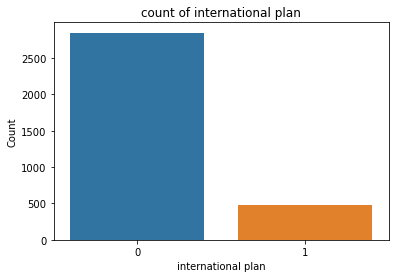

In [78]:
print(df['international plan'].value_counts())
sns.countplot(data=df, x='churn');
plt.xlabel('international plan')
plt.ylabel('Count')
plt.title('count of international plan')

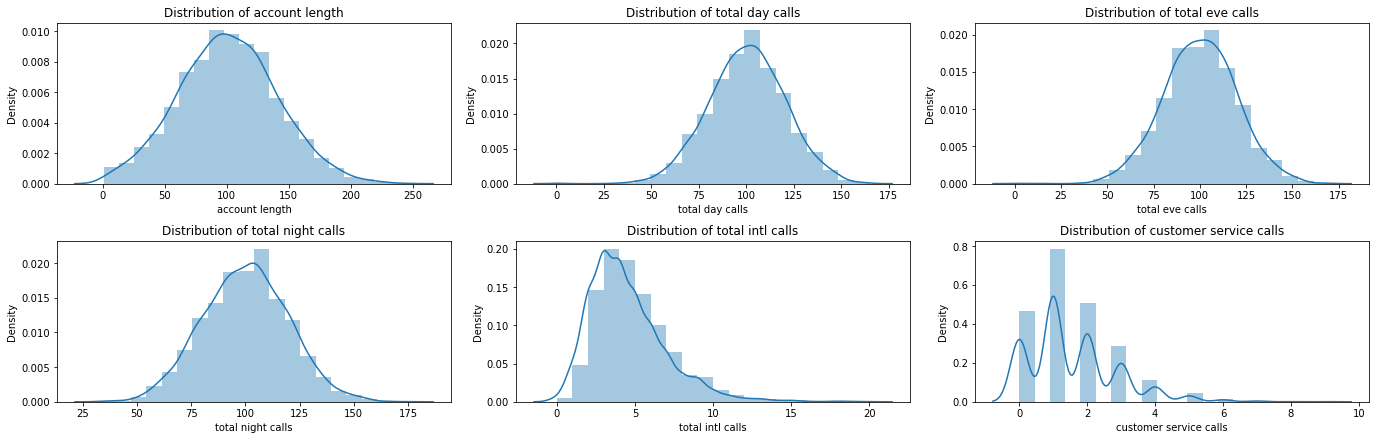

In [79]:
# Function to create distribution plots
def plot_distributions(df, columns, bins=20, figsize=(19, 6)):
    num_cols = len(columns)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
    fig, ax = plt.subplots(num_rows, 3, figsize=figsize, constrained_layout=True)
    ax = ax.flatten()  # Flatten the 2D array of axes to 1D for easier indexing

    for i, column in enumerate(columns):
        sns.distplot(df[column], bins=bins, ax=ax[i])
        ax[i].set_title(f'Distribution of {column}')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    plt.show()
    # Columns to plot
columns_to_plot = [
    'account length', 'total day calls', 'total eve calls',
    'total night calls', 'total intl calls', 'customer service calls'
]

# Call the function
plot_distributions(df, columns_to_plot)

## Checking for outliers

In [80]:
# creating categorical and numerical columns
num_columns = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categ_columns = ['state','area code','international plan','voice mail plan']

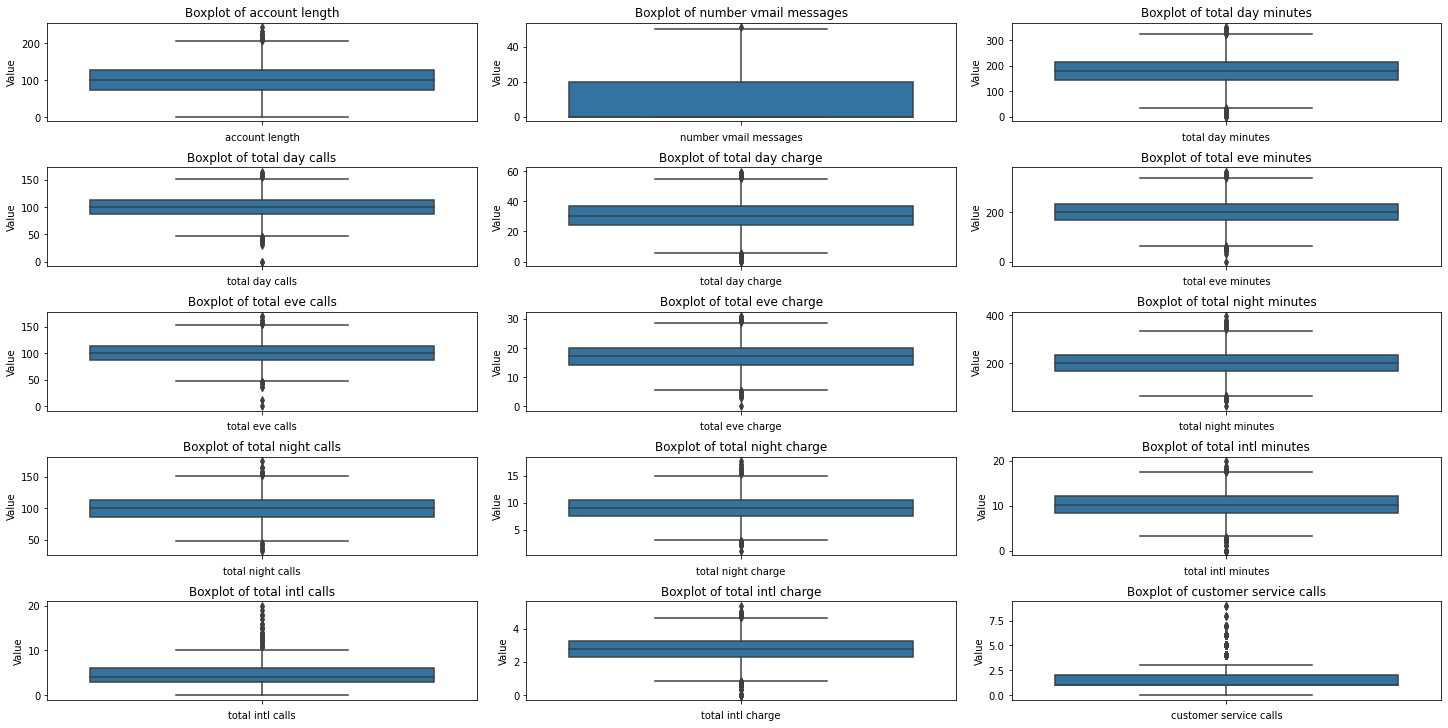

In [81]:
def plot_boxplots(df, columns, figsize=(20, 10)):
   
    n_cols = 3  # Number of columns in the subplot grid
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate rows needed based on the number of columns
    
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize, constrained_layout=True)
    ax = ax.flatten()  # Flatten the array of axes for easy iteration

    for i, column in enumerate(columns):
        sns.boxplot(y=df[column], ax=ax[i])
        ax[i].set_title(f'Boxplot of {column}')
        ax[i].set_xlabel(column)
        ax[i].set_ylabel('Value')
    
    # Remove any unused subplots
    for i in range(len(columns), len(ax)):
        fig.delaxes(ax[i])
    
    plt.show()
plot_boxplots(df, num_columns)

In [82]:
#dealing with outliers
def remove_outliers(df, columns):
    df_no_outliers = df.copy()
    for column in columns:
        z_scores = zscore(df[column])
        outliers = (z_scores > 3) | (z_scores < -3)
        df_no_outliers.loc[outliers, column] = df[column].median()
    return df_no_outliers
df_no_outliers = remove_outliers(df, num_columns)


## Bivariate analysis

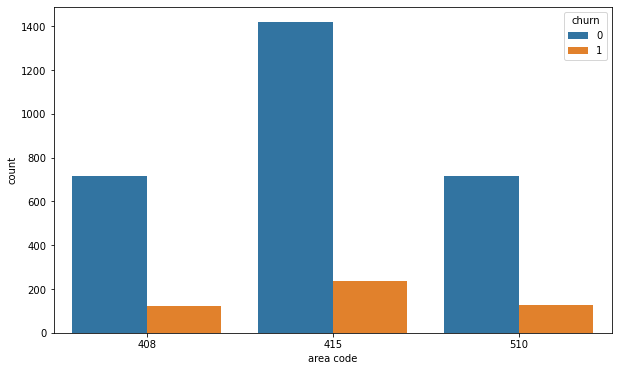

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='area code', hue='churn');

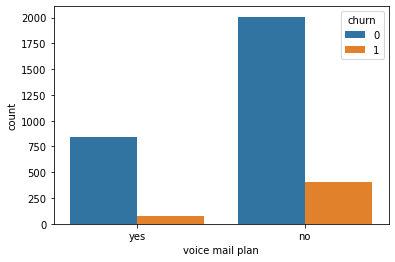

In [84]:
sns.countplot(data = df, x='voice mail plan', hue='churn');

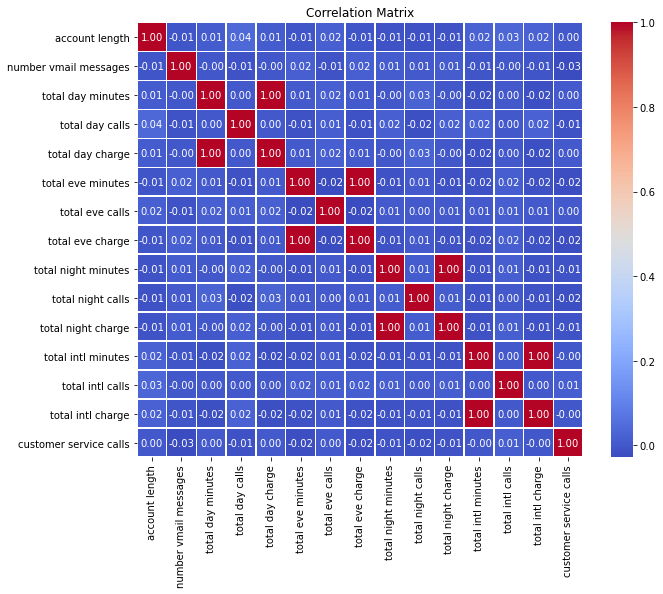

In [85]:
#correlation matrix for the num_columns
# Calculate the correlation matrix
correlation_matrix = df_no_outliers[num_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [86]:
# Function to identify and drop highly correlated features
def drop_highly_correlated_features(df, columns, threshold=0.9):
    # Calculate the correlation matrix
    corr_matrix = df[columns].corr().abs()
    
    # Create an upper triangle matrix of correlations
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find features with correlation greater than the threshold
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    
    # Drop the features
    df_dropped = df.drop(columns=to_drop)
    
    return df_dropped, to_drop
# Drop highly correlated features
df_reduced, dropped_features = drop_highly_correlated_features(df_no_outliers, num_columns, threshold=0.9)



## Data Preparation

## One hot encoding on categorcal columns

In [87]:
# Separate features and target
X = df_reduced.drop('churn', axis=1)
y = df_reduced['churn']

In [88]:
categorical_features = ['state', 'international plan', 'voice mail plan', 'area code']
ohe = OneHotEncoder(sparse=False)
X_categorical_encoded = ohe.fit_transform(X[categorical_features])
# Create a DataFrame for the encoded features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=ohe.get_feature_names(categorical_features))


## scaling

In [89]:
# Update num_columns to exclude dropped features
num_columns = [col for col in num_columns if col not in dropped_features]
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X[num_columns])

# Create a DataFrame for the scaled features
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=num_columns)

In [90]:
new_df = pd.concat([X_categorical_encoded_df, X_num_scaled_df], axis=1)

In [91]:
# Separate features and target
X = new_df
y = df['churn']

## Train-Test Split

In [92]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [93]:
#checking for imbalance 
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

we can see that that there's a case of imbalance hence will deal with it before proceeding

In [94]:
#applying smote
sm = SMOTE(random_state=1)
New_X_train, New_y_train = sm.fit_resample(X_train, y_train)

In [95]:
New_y_train.value_counts()

1    2281
0    2281
Name: churn, dtype: int64

## Modeling 

## Logistic Regression Classifier Model

In [96]:
# Instantiate the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(New_X_train, New_y_train)

# Make predictions on training data
y_pred_train = model.predict(New_X_train)
# Make predictions on test data
y_pred_test = model.predict(X_test)
# Print classification report for test data
print(classification_report(y_test, y_pred_test, target_names=['0', '1']))



              precision    recall  f1-score   support

           0       0.93      0.76      0.84       569
           1       0.33      0.67      0.44        98

    accuracy                           0.75       667
   macro avg       0.63      0.72      0.64       667
weighted avg       0.84      0.75      0.78       667



In [97]:


print('Training Precision: ', precision_score(New_y_train, y_pred_train))
print('Testing Precision: ', precision_score(y_test, y_pred_test))
print('\n\n')

print('Training Recall: ', recall_score(New_y_train, y_pred_train))
print('Testing Recall: ', recall_score(y_test, y_pred_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(New_y_train, y_pred_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test))
print('\n\n')

print('Training F1-Score: ', f1_score(New_y_train, y_pred_train))
print('Testing F1-Score: ', f1_score(y_test, y_pred_test))

Training Precision:  0.768522577816747
Testing Precision:  0.3251231527093596



Training Recall:  0.768522577816747
Testing Recall:  0.673469387755102



Training Accuracy:  0.768522577816747
Testing Accuracy:  0.7466266866566716



Training F1-Score:  0.768522577816747
Testing F1-Score:  0.43853820598006643


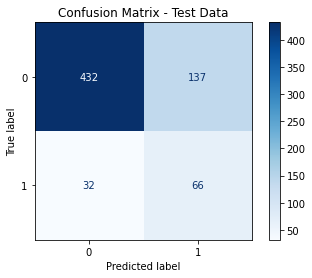

In [98]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
# Plot confusion matrix for the test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=['0', '1'])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.show()

## Decision Tree Classifier

In [99]:
model2 = DecisionTreeClassifier(random_state=23)
# Fit the model on the training data
model2.fit(New_X_train, New_y_train)

# Make predictions on training data
y_pred_train2 = model2.predict(New_X_train)
# Make predictions on test data
y_pred_test2 = model2.predict(X_test)
# Print classification report for test data
print(classification_report(y_test, y_pred_test2, target_names=['0', '1']))


print('Training Precision: ', precision_score(New_y_train, y_pred_train2))
print('Testing Precision: ', precision_score(y_test, y_pred_test2))
print('\n\n')

print('Training Recall: ', recall_score(New_y_train, y_pred_train2))
print('Testing Recall: ', recall_score(y_test, y_pred_test2))
print('\n\n')

print('Training Accuracy: ', accuracy_score(New_y_train, y_pred_train2))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test2))
print('\n\n')

print('Training F1-Score: ', f1_score(New_y_train, y_pred_train2))
print('Testing F1-Score: ', f1_score(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       569
           1       0.52      0.69      0.60        98

    accuracy                           0.86       667
   macro avg       0.73      0.79      0.76       667
weighted avg       0.88      0.86      0.87       667

Training Precision:  1.0
Testing Precision:  0.5230769230769231



Training Recall:  1.0
Testing Recall:  0.6938775510204082



Training Accuracy:  1.0
Testing Accuracy:  0.8620689655172413



Training F1-Score:  1.0
Testing F1-Score:  0.5964912280701755


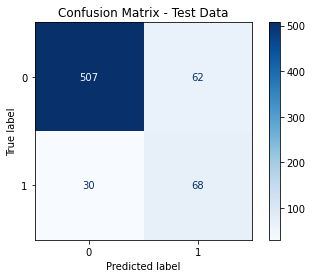

In [100]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test2)
# Plot confusion matrix for the test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=['0', '1'])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.show()

## Random Forest classifier

In [101]:
model3 = RandomForestClassifier(random_state=24)

# Fit the model on the training data
model3.fit(New_X_train, New_y_train)

# Make predictions on training data
y_pred_train3 = model3.predict(New_X_train)
# Make predictions on test data
y_pred_test3 = model3.predict(X_test)
# Print classification report for test data
print(classification_report(y_test, y_pred_test3, target_names=['0', '1']))


print('Training Precision: ', precision_score(New_y_train, y_pred_train3))
print('Testing Precision: ', precision_score(y_test, y_pred_test3))
print('\n\n')

print('Training Recall: ', recall_score(New_y_train, y_pred_train3))
print('Testing Recall: ', recall_score(y_test, y_pred_test3))
print('\n\n')

print('Training Accuracy: ', accuracy_score(New_y_train, y_pred_train3))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test3))
print('\n\n')

print('Training F1-Score: ', f1_score(New_y_train, y_pred_train3))
print('Testing F1-Score: ', f1_score(y_test, y_pred_test3))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       569
           1       0.69      0.64      0.67        98

    accuracy                           0.91       667
   macro avg       0.82      0.80      0.81       667
weighted avg       0.90      0.91      0.90       667

Training Precision:  1.0
Testing Precision:  0.6923076923076923



Training Recall:  1.0
Testing Recall:  0.6428571428571429



Training Accuracy:  1.0
Testing Accuracy:  0.9055472263868066



Training F1-Score:  1.0
Testing F1-Score:  0.6666666666666666


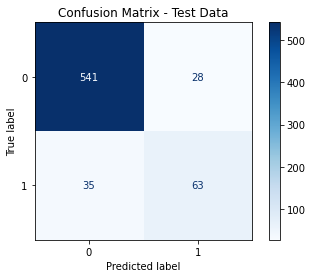

In [102]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test3)
# Plot confusion matrix for the test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=['0', '1'])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.show()

## K-Nearest Neighbors (KNN)

Testing Precision:  0.5230769230769231



Testing Recall:  0.6938775510204082



Testing Accuracy:  0.8620689655172413



Testing F1-Score:  0.5964912280701755


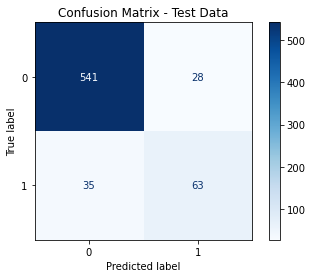

In [104]:
model4 = KNeighborsClassifier()
# Fit the model on the training data
model4.fit(New_X_train, New_y_train)

# Make predictions on test data
y_pred_test4 = model3.predict(X_test)
print('Testing Precision: ', precision_score(y_test, y_pred_test2))
print('\n\n')

print('Testing Recall: ', recall_score(y_test, y_pred_test2))
print('\n\n')

print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test2))
print('\n\n')

print('Testing F1-Score: ', f1_score(y_test, y_pred_test2))
# Calculate confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test4)

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=['0', '1'])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.show()


## Model Evaluation

Let's evaluate the best perfoming model from the  models above. We use the ROC curve and also compare their accuracy to check on whether one is overfitting. We will consider the one with the best AUC and also does not overfit.

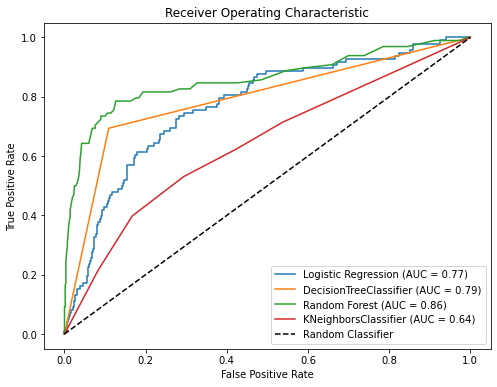

In [105]:
# Define the models
models = [model, model2, model3,model4]  

# Define the model names for plotting
model_names = ['Logistic Regression','DecisionTreeClassifier', 'Random Forest','KNeighborsClassifier']  

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))

for model, name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot the random classifier ROC curve (diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()

we can see that Random forest has a higher AUC as compared to the other two classifiers. We then compare their accuracies.

comparing accuracy score of the different models

In [106]:

# Create an empty DataFrame to store the results
results_accuracy = pd.DataFrame(columns=["Models", "Accuracy"])

# Iterate over the model names and models
for model_name, model in zip(model_names, models):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the results to the DataFrame
    results_accuracy = results_accuracy.append({"Models": model_name, "Accuracy": accuracy * 100}, ignore_index=True)

# Sort the DataFrame by accuracy in descending order
results_accuracy = results_accuracy.sort_values(by="Accuracy", ascending=False)

# Print the sorted results
print(results_accuracy)


                   Models   Accuracy
2           Random Forest  90.554723
1  DecisionTreeClassifier  86.206897
0     Logistic Regression  74.662669
3    KNeighborsClassifier  68.065967


The Random Forest model is an appropriate choice because of its high accuracy, F1 score, It obtained an accuracy of 94.685% and an F1 score of 0.841, demonstrating its ability to effectively identify occurrences while maintaining a balance of precision and recall.

## Perform hyperparameter tuning on the Random forest classifier

 This helps optimize the model's performance by finding the best set of hyperparameters. 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   29.7s finished


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       569
           1       0.72      0.65      0.68        98

    accuracy                           0.91       667
   macro avg       0.83      0.80      0.82       667
weighted avg       0.91      0.91      0.91       667

Training Precision:  1.0
Testing Precision:  0.6923076923076923



Training Recall:  1.0
Testing Recall:  0.6428571428571429



Training Accuracy:  1.0
Testing Accuracy:  0.9055472263868066



Training F1-Score:  1.0
Testing F1-Score:  0.6666666666666666


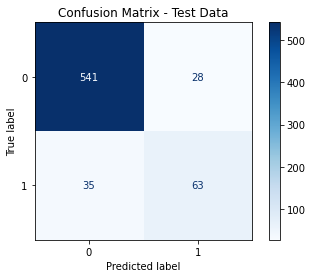

In [107]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
   'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Instantiate the logistic regression model
model_R = RandomForestClassifier()

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model_R, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(New_X_train, New_y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions on training data with the best model
y_pred_train = best_model.predict(New_X_train)

# Make predictions on test data with the best model
y_pred_test = best_model.predict(X_test)

# Print classification report for test data
print(classification_report(y_test, y_pred_test, target_names=['0', '1']))

# Calculate and print various performance metrics
print('Training Precision: ', precision_score(New_y_train, y_pred_train3))
print('Testing Precision: ', precision_score(y_test, y_pred_test3))
print('\n\n')

print('Training Recall: ', recall_score(New_y_train, y_pred_train3))
print('Testing Recall: ', recall_score(y_test, y_pred_test3))
print('\n\n')

print('Training Accuracy: ', accuracy_score(New_y_train, y_pred_train3))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test3))
print('\n\n')

print('Training F1-Score: ', f1_score(New_y_train, y_pred_train3))
print('Testing F1-Score: ', f1_score(y_test, y_pred_test3))

# Calculate confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test3)

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=['0', '1'])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.show()


## Important features in the model

                   Feature  Importance
60       total day minutes    0.160253
68  customer service calls    0.124444
67        total intl calls    0.069781
62       total eve minutes    0.068455
64     total night minutes    0.049783
..                     ...         ...
0                 state_AK    0.001749
6                 state_CT    0.001739
36                state_OK    0.001327
17                state_KY    0.001317
12                state_IA    0.001108

[69 rows x 2 columns]


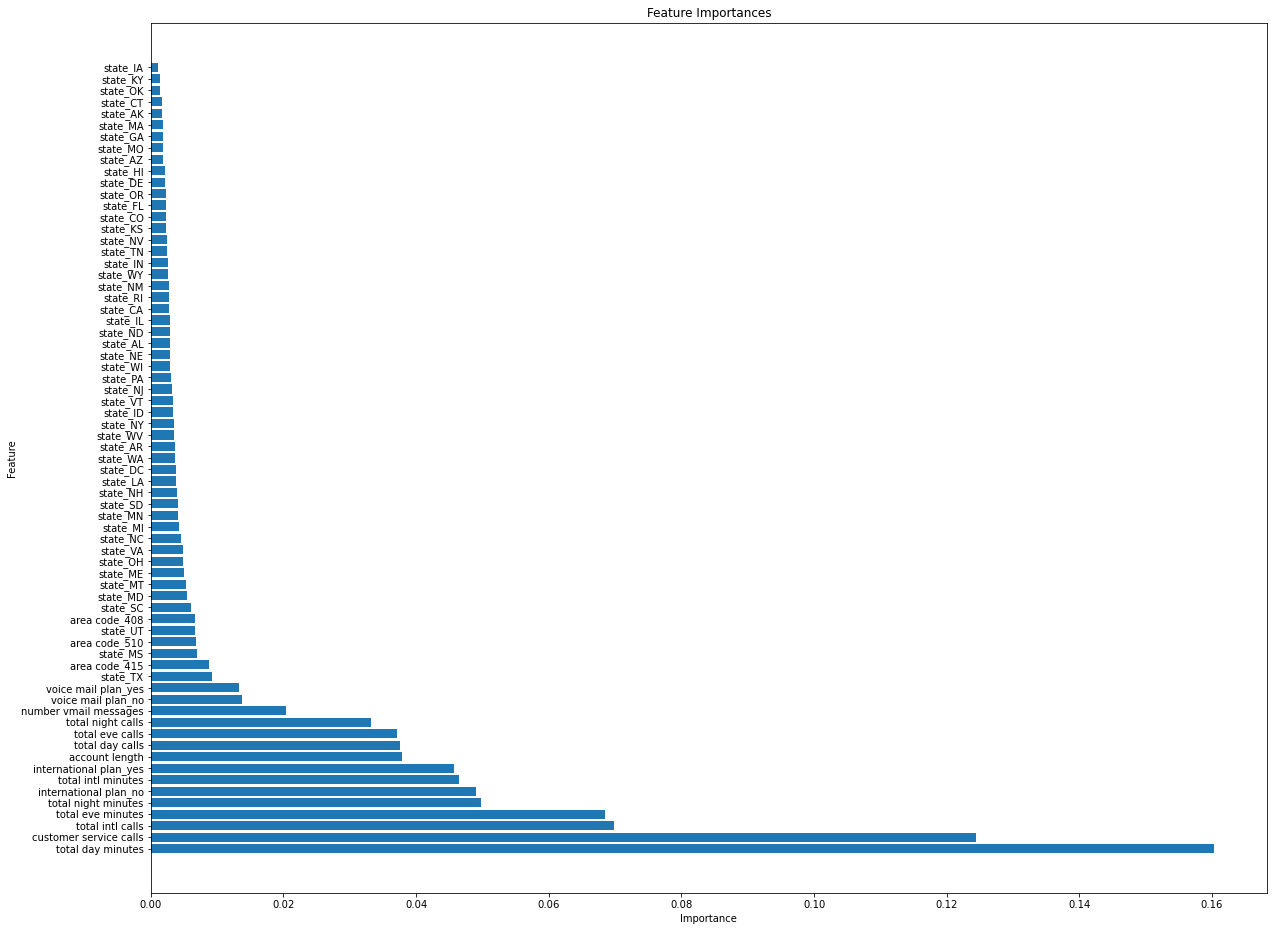

In [108]:
# Get feature importances
importances = model3.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': New_X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print or visualize feature importances
print(feature_importances)

# If you want to plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()




The graph above shows total day minutes, number of customer service calls, total intl calls, total evening minutes, total night minutes  to be among the top important features in this model

## Recommendations

Drawing insights from EDA and important features below are some reccomendations for Syria_Tel to promote customer retention;

* Improve Customer Service Quality: Focus on training customer service representatives to handle issues more effectively and efficiently. Aim to resolve customer issues on the first call to reduce the need for multiple interactions.
* Proactive Outreach: Implement a proactive customer service approach where representatives reach out to customers periodically to ensure satisfaction and address potential issues before they result in churn.
* Customer Feedback: Collect feedback after every customer service interaction and use this data to continuously improve service quality. Implement a follow-up mechanism to ensure the customer’s issue was resolved satisfactorily.
* Evaluate International Plan Pricing: Review the pricing structure of international plans to ensure they are competitive and offer good value. Consider offering discounted rates or bundling international minutes with other services.
* Targeted Promotions: Create special offers or promotions for customers with international plans to increase their satisfaction and loyalty.
* Monitor Usage Patterns: Analyze the usage patterns of international plan subscribers to identify any dissatisfaction points and address them promptly.
* Localized Promotions: Develop targeted marketing campaigns and promotions specifically for customers in area code 415 to improve retention.
* Community Engagement: Engage with local communities through events, sponsorships, and partnerships to build a stronger brand presence and customer loyalty.
* Competitive Analysis: Conduct a competitive analysis in the area to understand why customers might be churning and address those factors, such as better pricing, offers, or service quality from competitors.
* Incentivize Voicemail Plans: Offer incentives for customers to add a voicemail plan, such as discounts or bundled packages that include voicemail at a reduced rate.
* Highlight Benefits: Communicate the benefits of having a voicemail plan, such as increased convenience and better call management.
* Free Trial: Provide a free trial period for the voicemail plan to encourage customers to try the service and experience its value.

## Conclusion

The analysis provided valuable insights into the factors contributing to customer churn. By examining customer behavior and service attributes, several key factors have been identified,this was achieved by fitting models which provided a clear predictive power on customers churn as well as identifying important features.Based on these insights,I have  recommended strategies to reduce churn and enhance customer satisfaction